In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [5]:
df_raw = pd.read_csv('houseprice_hw.csv')
df_raw.head()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [6]:
df_raw.isnull().sum()

Unnamed: 0      0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

## 목표 레이블 : SalePrice

### exersise1. corr(), scatter을 이용해서 가장 상관관계가 큰 2개의 특성만 골라보기

In [7]:
df_raw.corr(method='pearson')
df_raw.corr()

,Unnamed: 0,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Unnamed: 0,1.000000,-0.028365,-0.012713,-0.021998,-0.015415,0.010496,0.008273,0.005587,0.027239,0.016570,0.017634,-0.021917
OverallQual,-0.028365,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,-0.012713,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,-0.021998,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,-0.015415,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.010496,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.008273,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.005587,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.027239,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.016570,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409


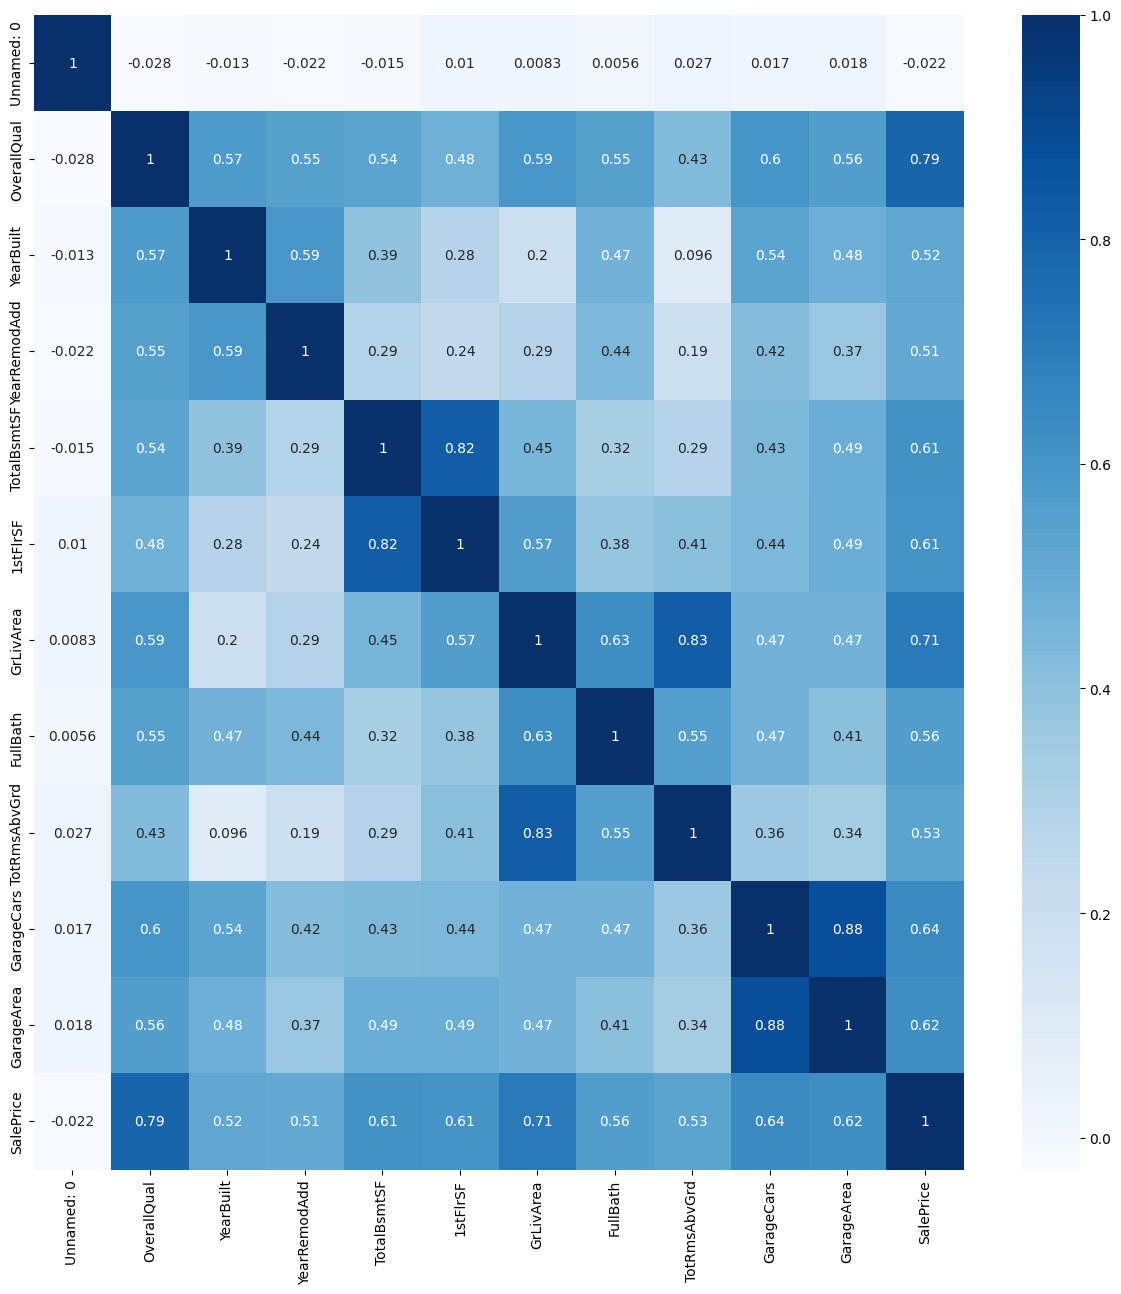

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_raw.corr(), annot= True, cmap='Blues')
plt.show()

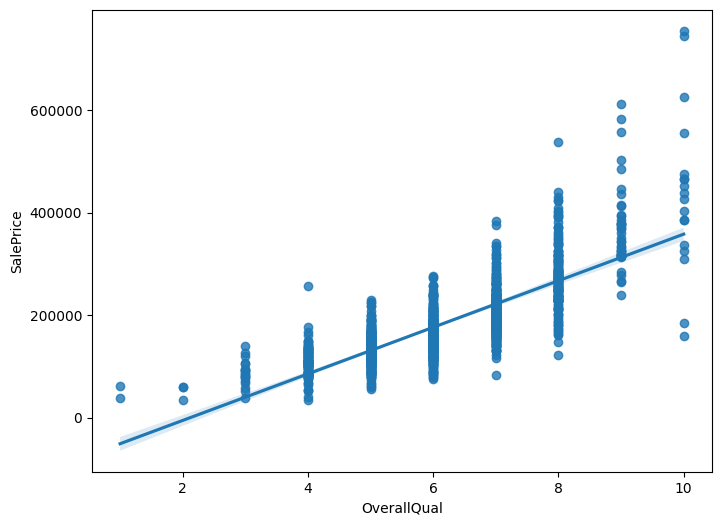

In [9]:
plt.figure(figsize=[8, 6])
sns.regplot(x=df_raw['OverallQual'], y=df_raw['SalePrice'])
plt.show()

In [15]:
df_raw["OverallQual"].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

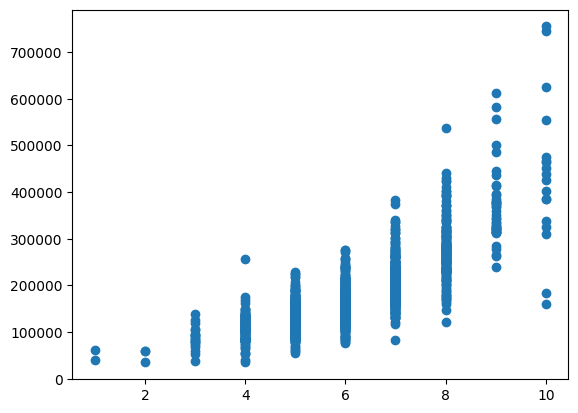

In [11]:
Y = df_raw["SalePrice"]
X = df_raw["OverallQual"]

scatter = plt.scatter(X, Y)
scatter

### 퍼셉트론 알고리즘으로 모델 학습시키기.

hint! numpy배열을 함수의 인자로 하고, df는 함수의 인자로 받지 않으니깐, values를 이용해서 df의 값만 넣어주자.

df에 표준화를 하고, 학습시키는것을 권장. 

!!**주의**!! : 나중에 임의의 값 예측하기 위해서는 사용했던 표준화함수로 내가 넣고싶은값을 다시 표준화 해야함!!

model.predict(df_X, df_Y) (x)

model.predict(df_X.value, df_Y.value) (x)

In [12]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

### 아달린 알고리즘으로 모델 학습시키기.

값 그 자체를 손실함수로 한다. -> 표준화하지 않고 그대로 값을 대입해야한다.

In [13]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

### 로지스틱 알고리즘 모델 학습시키기.

전처리-훈련 모든과정이 퍼셉트론과 (아직은)완벽히 일치한다! (물런 모델 훈련 내부과정은 다르다.)

In [14]:
## 예측하고나서, 3개정도의 값을 임의의로 넣어서 예측결과 출력해보시오!
## code here!

## 이론 Quiz

### 왜 아달린 알고리즘(회귀) 에서는 로지스틱, 퍼셉트론 (분류) 데이터셋에 표준화를 하지 않을까? 

간단히 설명하시오.
.

.

참고:
#### 표준화란? 표준화는 데이터를 일정한 범위로 맞추기 위해 평균이 0, 표준편차가 1이 되도록 변환하는 과정

공식: $$ z = \frac{x - \mu}{\sigma} $$

예시

표준화 전: x=[10,20,30,40,50]

x -> 표준화함수Std() -> z

표준화 후: z=[−1.41,−0.71,0,0.71,1.41]